## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [4]:
X.isna().sum() #пропусков нет

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

категориальнх переменых нет, все переменные числовые

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [6]:
from sklearn.model_selection import train_test_split
np.random.seed()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [31]:
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()

X1_train = pd.DataFrame(data=normalizer.fit_transform(X_train[['alcohol', 'magnesium']]))
X1_test = pd.DataFrame(data=normalizer.fit_transform(X_test[['alcohol', 'magnesium']]))

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [33]:
res = pd.DataFrame({'NN': [], 'Train': [], 'Test': []})

In [34]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(X1_train, y_train)
row1 = {'NN': '1', 'Train': accuracy_score(y_train, clf1.predict(X1_train)), 'Test': accuracy_score(y_test, clf1.predict(X1_test))}

In [35]:
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X1_train, y_train)
row2 = {'NN': '3', 'Train': accuracy_score(y_train, clf2.predict(X1_train)), 'Test': accuracy_score(y_test, clf2.predict(X1_test))}

In [36]:
clf3 = KNeighborsClassifier(n_neighbors=5)
clf3.fit(X1_train, y_train)
row3 = {'NN': '5', 'Train': accuracy_score(y_train, clf3.predict(X1_train)), 'Test': accuracy_score(y_test, clf3.predict(X1_test))}

In [37]:
clf4 = KNeighborsClassifier(n_neighbors=10)
clf4.fit(X1_train, y_train)
row4 = {'NN': '10', 'Train': accuracy_score(y_train, clf4.predict(X1_train)), 'Test': accuracy_score(y_test, clf4.predict(X1_test))}

In [38]:
clf5 = KNeighborsClassifier(n_neighbors=15)
clf5.fit(X1_train, y_train)
row5 = {'NN': '15', 'Train': accuracy_score(y_train, clf5.predict(X1_train)), 'Test': accuracy_score(y_test, clf5.predict(X1_test))}

In [39]:
clf6 = KNeighborsClassifier(n_neighbors=25)
clf6.fit(X1_train, y_train)
row6 = {'NN': '25', 'Train': accuracy_score(y_train, clf6.predict(X1_train)), 'Test': accuracy_score(y_test, clf6.predict(X1_test))}

In [40]:
res = res.append([row1, row2, row3, row4, row5, row6], ignore_index=True).round(2)
res

,NN,Train,Test
0,1,1.00,0.63
1,3,0.81,0.67
2,5,0.78,0.65
3,10,0.73,0.72
4,15,0.70,0.69
5,25,0.69,0.65


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [17]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

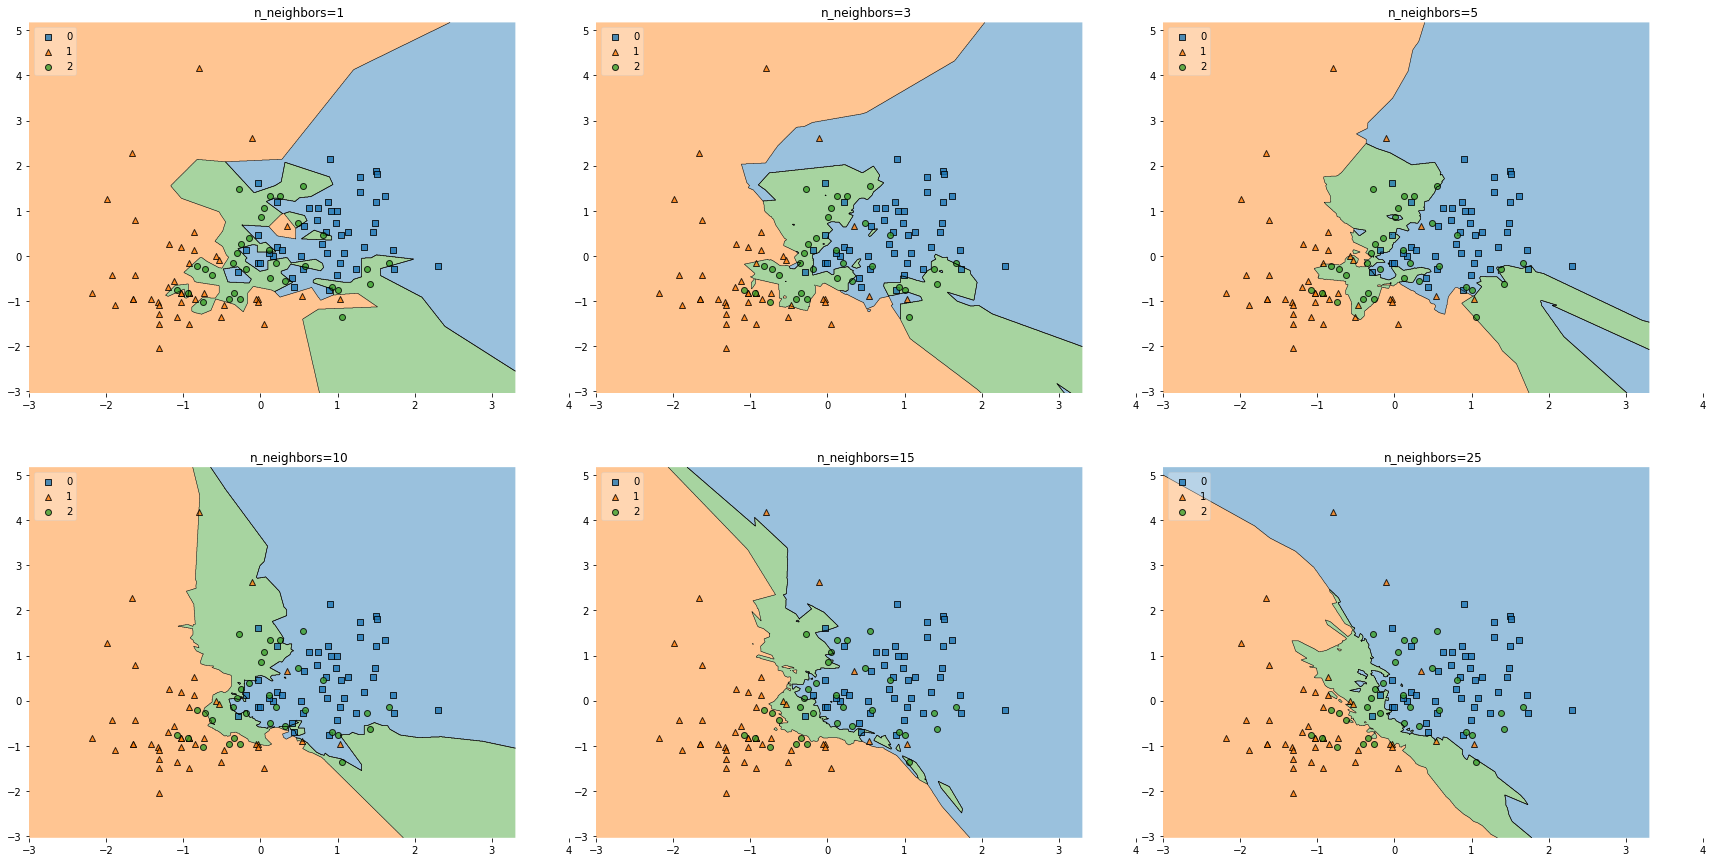

In [20]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(30,15))

labels = ['n_neighbors=1', 'n_neighbors=3', 'n_neighbors=5', 'n_neighbors=10', 'n_neighbors=15', 'n_neighbors=25']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6],
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X1_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(X1_train), y=y_train, clf=clf, legend=2)
    plt.title(lab)
    plt.xlim([-3, 2])
    plt.xlim([-3, 4])
    plt.subplots_adjust(wspace=0.05)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Начнем с получившейся таблицы. Качество на обучающей выборке самое лучшее, но оно обманчиво, ведь алгоритм уже знает эти объекты, поэтому смотрим качество на тестовой выборке (ответы для которой мы нигде не подсматривали).
По тестовой выборке видно, что лучшее качество достигается при k=10.


Теперь взгянем на графики. При  𝑘=1  вокруг каждого объекта обучающей выборки создается область его класса. Если в "большую" область одного класса случайно попал один шумовой объект другого класса, вокруг этого шумового объекта будет "остров" предсказания другого класса. Это нелогично и говорит о переобучении. При использовании малых  𝑘  разделяющая поверхность слишком сложная, на нее оказывают сильное воздействие шумовые объекты. Далее поверхность становится ровнее и ровнее и при  𝑘=25  выглядит наиболее разумно.

В общем, оптимально использовать 𝑘=25, доля правильных ответов достаточна, а разделяющая поверхность выглядит просто и логично.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

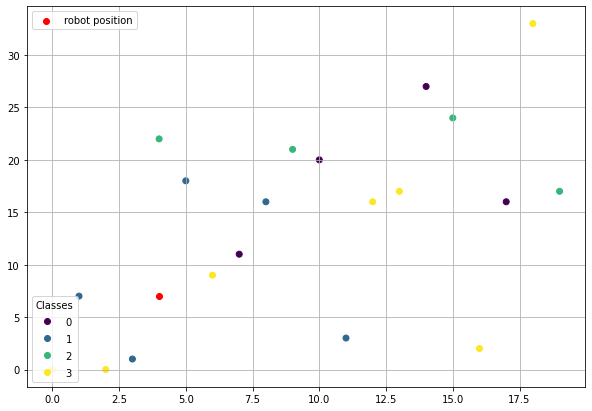

In [95]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        self.k = k
        self.initial_position = initial_position
        self.landmarks = landmarks
        self.classes = classes
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = [np.array([[initial_position[0], initial_position[1]]])]
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k).fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
    def move(self):
        if np.random.binomial(True, 0.8):
            new = self.mapping[self.knn.predict(self.trajectory[-1])[0]]
            new = new+np.array(self.trajectory[-1])
            self.trajectory.append(new)
        else:
            self.trajectory.append(self.mapping[0]+np.array(self.trajectory[-1]))
        pass

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [115]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[::, 0], landmarks[::, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = np.array([[x[0] for l in robot.trajectory for x in l], [x[1] for l in robot.trajectory for x in l]])
    ax.plot(traj[0], traj[1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

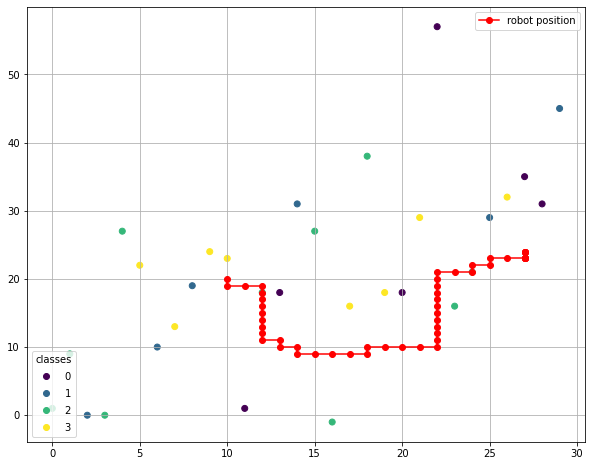

In [116]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

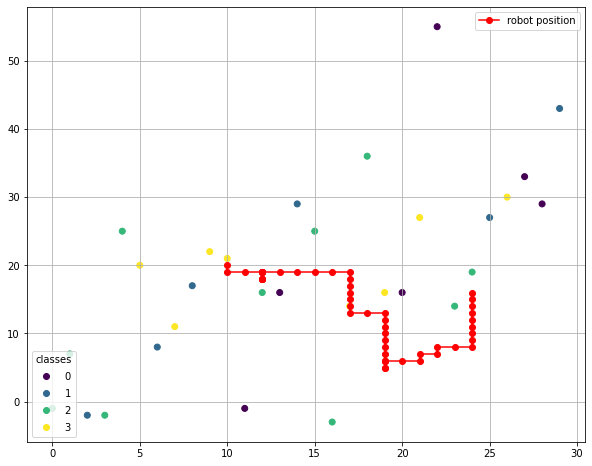

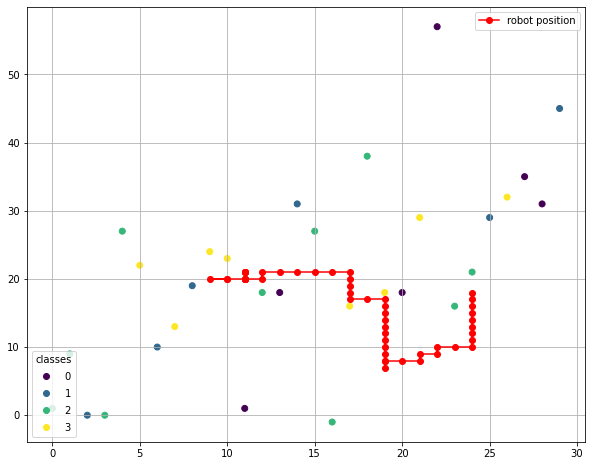

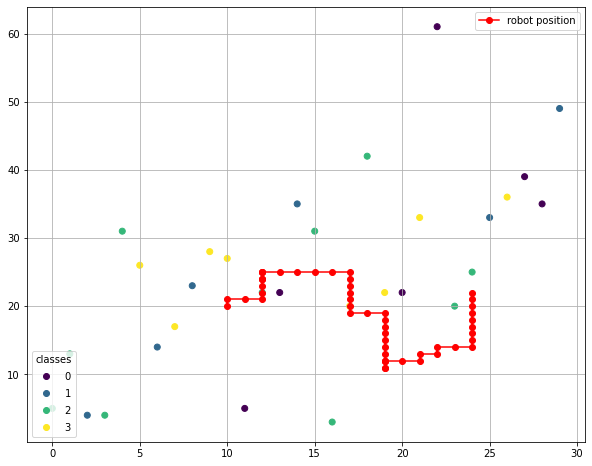

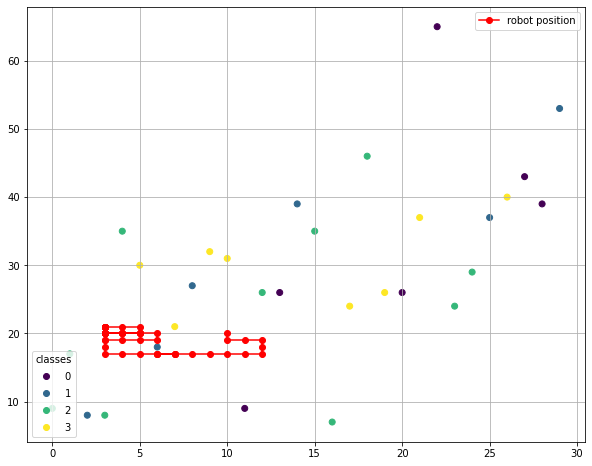

In [124]:
conduct_experiment(x, mean = 1, std = 10, k = 1, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)
conduct_experiment(x, mean = 7, std = 10, k = 1, n_movements = 50)
conduct_experiment(x, mean = 11, std = 10, k = 1, n_movements = 50)

траектории при k=1 и k=3 похожи робот не уехал далеко, все время двигался в одном углу
при k=7 более ступенчатая траектория
при большом k (k=11) робот не уехал далеко, все время двигался в одном углу

если классы назначаются меткам не случайно, а осмысленно, то задача робота пройти заранее определенный путь

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [41]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [42]:
data.isnull().any().any() #False - пропусков нет

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [43]:
data = data.drop('Unnamed: 0', 1)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

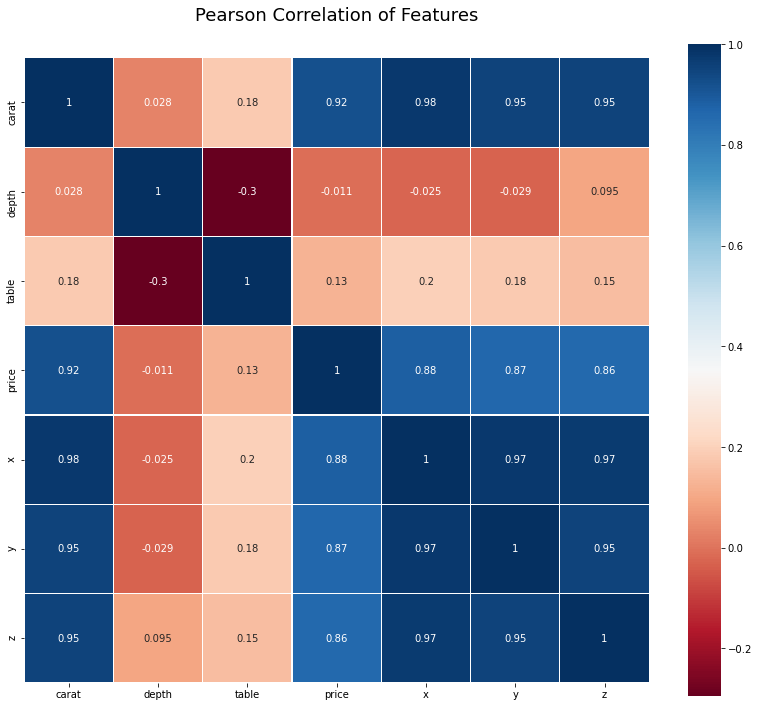

In [44]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(data.select_dtypes(include='number').corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

бальше всего коррелируют carat, x, y, z

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [51]:
X_dum = pd.get_dummies(data)
X_dum.shape

(53940, 27)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [52]:
X = X_dum.drop('price', 1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [53]:
#проще сделать масштабирование на еще не разделенной выборке
normalizer = StandardScaler()

X_dum[['carat', 'depth', 'table', 'x', 'y', 'z']] = pd.DataFrame(data=normalizer.fit_transform(X_dum[['carat', 'depth', 'table', 'x', 'y', 'z']]))

In [54]:
X = X_dum.drop('price', 1)
np.random.seed()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train,y_train)

print ("Train: {}".format(mean_squared_error(y_train, lr.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lr.predict(X_test))))

Train: 1258257.280771344
Test: 1323525.9998023235


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [56]:
LinearRegression().fit(X_train, y_train)
list(zip(X_train.columns, lr.coef_))

[('carat', 5335.194947335044),
 ('depth', -87.38569080033176),
 ('table', -56.71168303515374),
 ('x', -1278.7556376521684),
 ('y', 154.10676810062705),
 ('z', -34.1529375583666),
 ('cut_Fair', -584.0322373786998),
 ('cut_Good', -12.824799468237913),
 ('cut_Ideal', 253.62008227230703),
 ('cut_Premium', 193.708801019195),
 ('cut_Very Good', 149.52815355544038),
 ('color_D', 821.295453815697),
 ('color_E', 614.6800111888481),
 ('color_F', 543.4423030170565),
 ('color_G', 351.23555612919716),
 ('color_H', -159.01285104391394),
 ('color_I', -640.2966330066529),
 ('color_J', -1531.3438401002338),
 ('clarity_I1', -3733.542951599161),
 ('clarity_IF', 1480.9332779804995),
 ('clarity_SI1', -156.6934724604997),
 ('clarity_SI2', -1117.4830209195616),
 ('clarity_VS1', 758.9131209177954),
 ('clarity_VS2', 444.8097430304775),
 ('clarity_VVS1', 1188.6331847902047),
 ('clarity_VVS2', 1134.4301182602394)]

вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных: 'x', 'carat'.

категориальные признаки имеют огромные веса

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [58]:
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(10).fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test))))

list(zip(X_train.columns, lasso.coef_))

Train: 1295890.4318795418
Test: 1363990.210404538


[('carat', 4855.824424107589),
 ('depth', -100.4259244748428),
 ('table', -77.48694332056736),
 ('x', -729.9876076208477),
 ('y', -0.0),
 ('z', -26.618160192821286),
 ('cut_Fair', -434.72076990818766),
 ('cut_Good', -53.54418005348552),
 ('cut_Ideal', 81.00299615469629),
 ('cut_Premium', 0.0),
 ('cut_Very Good', 0.0),
 ('color_D', 322.03622012366384),
 ('color_E', 157.44221183235464),
 ('color_F', 94.55855606077961),
 ('color_G', 0.0),
 ('color_H', -445.9377301819417),
 ('color_I', -864.4498082125972),
 ('color_J', -1643.12048684537),
 ('clarity_I1', -3494.2137503980516),
 ('clarity_IF', 649.9507039324146),
 ('clarity_SI1', -628.5177109095655),
 ('clarity_SI2', -1527.826093600084),
 ('clarity_VS1', 157.56614359735858),
 ('clarity_VS2', -21.049159675527974),
 ('clarity_VVS1', 521.4622020259404),
 ('clarity_VVS2', 516.8856365694832)]

In [59]:
ridge = Ridge(10).fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, ridge.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, ridge.predict(X_test))))
list(zip(X_train.columns, ridge.coef_))

Train: 1258422.1443513555
Test: 1323470.875367925


[('carat', 5294.74956767686),
 ('depth', -85.94653230190237),
 ('table', -57.191568412760525),
 ('x', -1221.0543051870693),
 ('y', 136.5794912044384),
 ('z', -37.82122873782089),
 ('cut_Fair', -586.2036643130424),
 ('cut_Good', -12.805232979660065),
 ('cut_Ideal', 254.5372584920695),
 ('cut_Premium', 193.30287852140845),
 ('cut_Very Good', 151.16876047339414),
 ('color_D', 816.4864773224323),
 ('color_E', 611.0883519018358),
 ('color_F', 539.706174400512),
 ('color_G', 349.51556107961466),
 ('color_H', -159.21602409021708),
 ('color_I', -637.2441539544988),
 ('color_J', -1520.336386621712),
 ('clarity_I1', -3664.6146719696358),
 ('clarity_IF', 1462.5155723816042),
 ('clarity_SI1', -164.45962690014892),
 ('clarity_SI2', -1120.9685219718615),
 ('clarity_VS1', 749.2875202088163),
 ('clarity_VS2', 436.5983236700538),
 ('clarity_VVS1', 1177.4101366648654),
 ('clarity_VVS2', 1124.2312679500435)]

веса категориальных значительно уменьшились

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69822701.68650818, tolerance: 59638361.985252894
  model = cd_fast.enet_coordinate_descent(


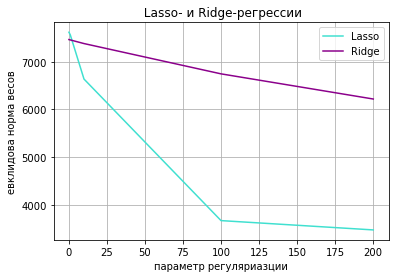

In [61]:
x = [0.1, 1, 10, 100, 200]
fig, ax = plt.subplots()

y1 = [np.linalg.norm(Lasso(i).fit(X_train,y_train).coef_) for i in x]
y2 = [np.linalg.norm(Ridge(i).fit(X_train,y_train).coef_) for i in x]

ax.plot(x, y1, color = '#40e0d0', label = 'Lasso')
ax.plot(x, y2, color = 'darkmagenta', label = 'Ridge')

ax.legend()
ax.grid()
plt.title(" Lasso- и Ridge-регрессии")
plt.xlabel("параметр регуляриазции")
plt.ylabel("евклидова норма весов")
plt.show()

Lasso-регрессия агрессивно уменьшает веса при увеличении коэффициента регуляризации. Lasso-регрессия сводит набор данных только к наиболее важным признакам, которые будут влиять на «целевую переменную».
Регуляризация Lasso добавляет штраф, равный сумме абсолютных значений коэффициентов. Добавив штраф, некоторые из коэффициентов становятся =0, остальные признаки будут самыми полезными. Этот метод регуляризации можно рассматривать как метод выбора признаков.
В Ridge-регрессии, поскольку применяется штраф, коэффициенты не претерпевают значительных изменений до 0, скорее, они медленно уменьшается до 0. Следовательно, Ridge не может использоваться для выбора признаков в отличие от Lasso.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [102]:
from sklearn.linear_model import LassoCV
model=LassoCV(n_alphas=5, alphas=x, cv=5).fit(X_train, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207157139.76339722, tolerance: 47788200.98533462
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9249082876.165653, tolerance: 47788200.98533462
  model = cd_fast.enet_coordinate_descent_gram(


   alpha           MSE
0  200.0  2.400162e+06
1  100.0  2.201865e+06
2   10.0  1.298219e+06
3    1.0  1.263223e+06
4    0.1  1.279920e+06


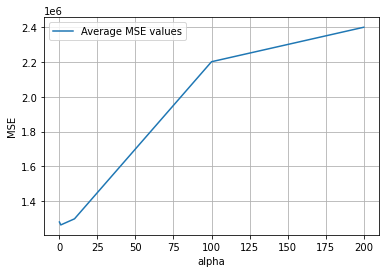

In [123]:
print(pd.DataFrame({'alpha': model.alphas_, 'MSE': model.mse_path_.mean(axis=1)}))
plt.plot(model.alphas_, model.mse_path_.mean(axis=1), 
         label='Average MSE values')
plt.grid(True)
plt.legend(loc='upper left')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.show()

Наилучшее качество при alpha=1

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [124]:
from sklearn.linear_model import Ridge, Lasso
lasso = Lasso(1).fit(X_train,y_train)
print ("Train: {}".format(mean_squared_error(y_train, lasso.predict(X_train))))
print ("Test: {}".format(mean_squared_error(y_test, lasso.predict(X_test))))

list(zip(X_train.columns, lasso.coef_))

Train: 1258853.9409448274
Test: 1320825.613430504


[('carat', 5287.782046931458),
 ('depth', -89.85000446990206),
 ('table', -59.06418614831778),
 ('x', -1129.9795718609598),
 ('y', 37.59270959489994),
 ('z', -28.73094563064228),
 ('cut_Fair', -711.5008458738279),
 ('cut_Good', -153.8321727412836),
 ('cut_Ideal', 98.64247018819056),
 ('cut_Premium', 31.901337356505397),
 ('cut_Very Good', 0.0),
 ('color_D', 455.6556772664581),
 ('color_E', 253.4798819019398),
 ('color_F', 182.81377723839063),
 ('color_G', 0.0),
 ('color_H', -503.72204199683136),
 ('color_I', -978.504539268448),
 ('color_J', -1858.2640403893913),
 ('clarity_I1', -4197.717639216639),
 ('clarity_IF', 912.7841155876348),
 ('clarity_SI1', -689.7520369519829),
 ('clarity_SI2', -1644.7437315371715),
 ('clarity_VS1', 213.60195400298016),
 ('clarity_VS2', -87.65398748075962),
 ('clarity_VVS1', 636.4004456129638),
 ('clarity_VVS2', 587.1412624717151)]

самые информативные: караты, длина, качество среза, уступающее другим, некоторые цвета и недостаточные значение чистоты.
неинформативные: cut_Very Good, color_G. Также небольшой вклад вносят признаки depth, table, y, z и определленые значения качество среза, цвета и чистоты.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [125]:
print ("Test : {}".format(mean_squared_error(y_test, lr.predict(X_test))))
print ("Test lasso: {}".format(mean_squared_error(y_test, lasso.predict(X_test))))

Test : 1323525.9998023235
Test lasso: 1320825.613430504


среднеквадратичная ошибка Lasso-регрессии меньше ошибки обычной линейной регрессии, следовательно, для предсказаний лучше использовать Lasso с подобранным коэффициентом регулярицации. Lasso помогает избежать переполнения данных, зануляя неинформативные признаки. 